# Maschinelles Lernen
# Aufgabenblatt 07 - Aufgabe 02
# Prof. Dr. David Spieler - modified Prof. Dr. Christoph Böhm

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# es gibt fehlende Werte in horsepower; wir lassen diese Beobachtungen weg
df = pd.read_csv('data/Auto.csv')
df = df[df.horsepower != '?']

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# response
y = df['cylinders']
# features
X = df.drop(columns=['name', 'cylinders'])

# fit des Entscheidungsbaums
dt = DecisionTreeClassifier(criterion = "gini", min_samples_split = 5)
score = cross_val_score(dt, X, y, cv=3, scoring='accuracy')
score

array([0.94656489, 0.96946565, 0.80769231])

In [5]:
print(score.mean())

0.9079076140144843


In [6]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

# Aufgabe 2.4
Es kann eine Genauigkeit von ca. 91% erreicht werden.

In [7]:
type(y)

pandas.core.series.Series

[Text(0.5294117647058824, 0.9, 'x[1] <= 159.5\ngini = 0.628\nsamples = 392\nvalue = [4.0, 199.0, 3.0, 83.0, 103.0]'),
 Text(0.29411764705882354, 0.7, 'x[2] <= 96.5\ngini = 0.109\nsamples = 211\nvalue = [4, 199, 2, 6, 0]'),
 Text(0.17647058823529413, 0.5, 'x[3] <= 2920.0\ngini = 0.032\nsamples = 185\nvalue = [1, 182, 1, 1, 0]'),
 Text(0.11764705882352941, 0.3, 'x[4] <= 13.85\ngini = 0.011\nsamples = 175\nvalue = [1, 174, 0, 0, 0]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [1, 9, 0, 0, 0]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.0\nsamples = 165\nvalue = [0, 165, 0, 0, 0]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.34\nsamples = 10\nvalue = [0, 8, 1, 1, 0]'),
 Text(0.4117647058823529, 0.5, 'x[4] <= 14.2\ngini = 0.521\nsamples = 26\nvalue = [3, 17, 1, 5, 0]'),
 Text(0.35294117647058826, 0.3, 'gini = 0.66\nsamples = 10\nvalue = [3, 4, 0, 3, 0]'),
 Text(0.47058823529411764, 0.3, 'gini = 0.32\nsamples = 16\nvalue = [0, 13, 1, 2, 0]'),
 Text(0.764705882352941

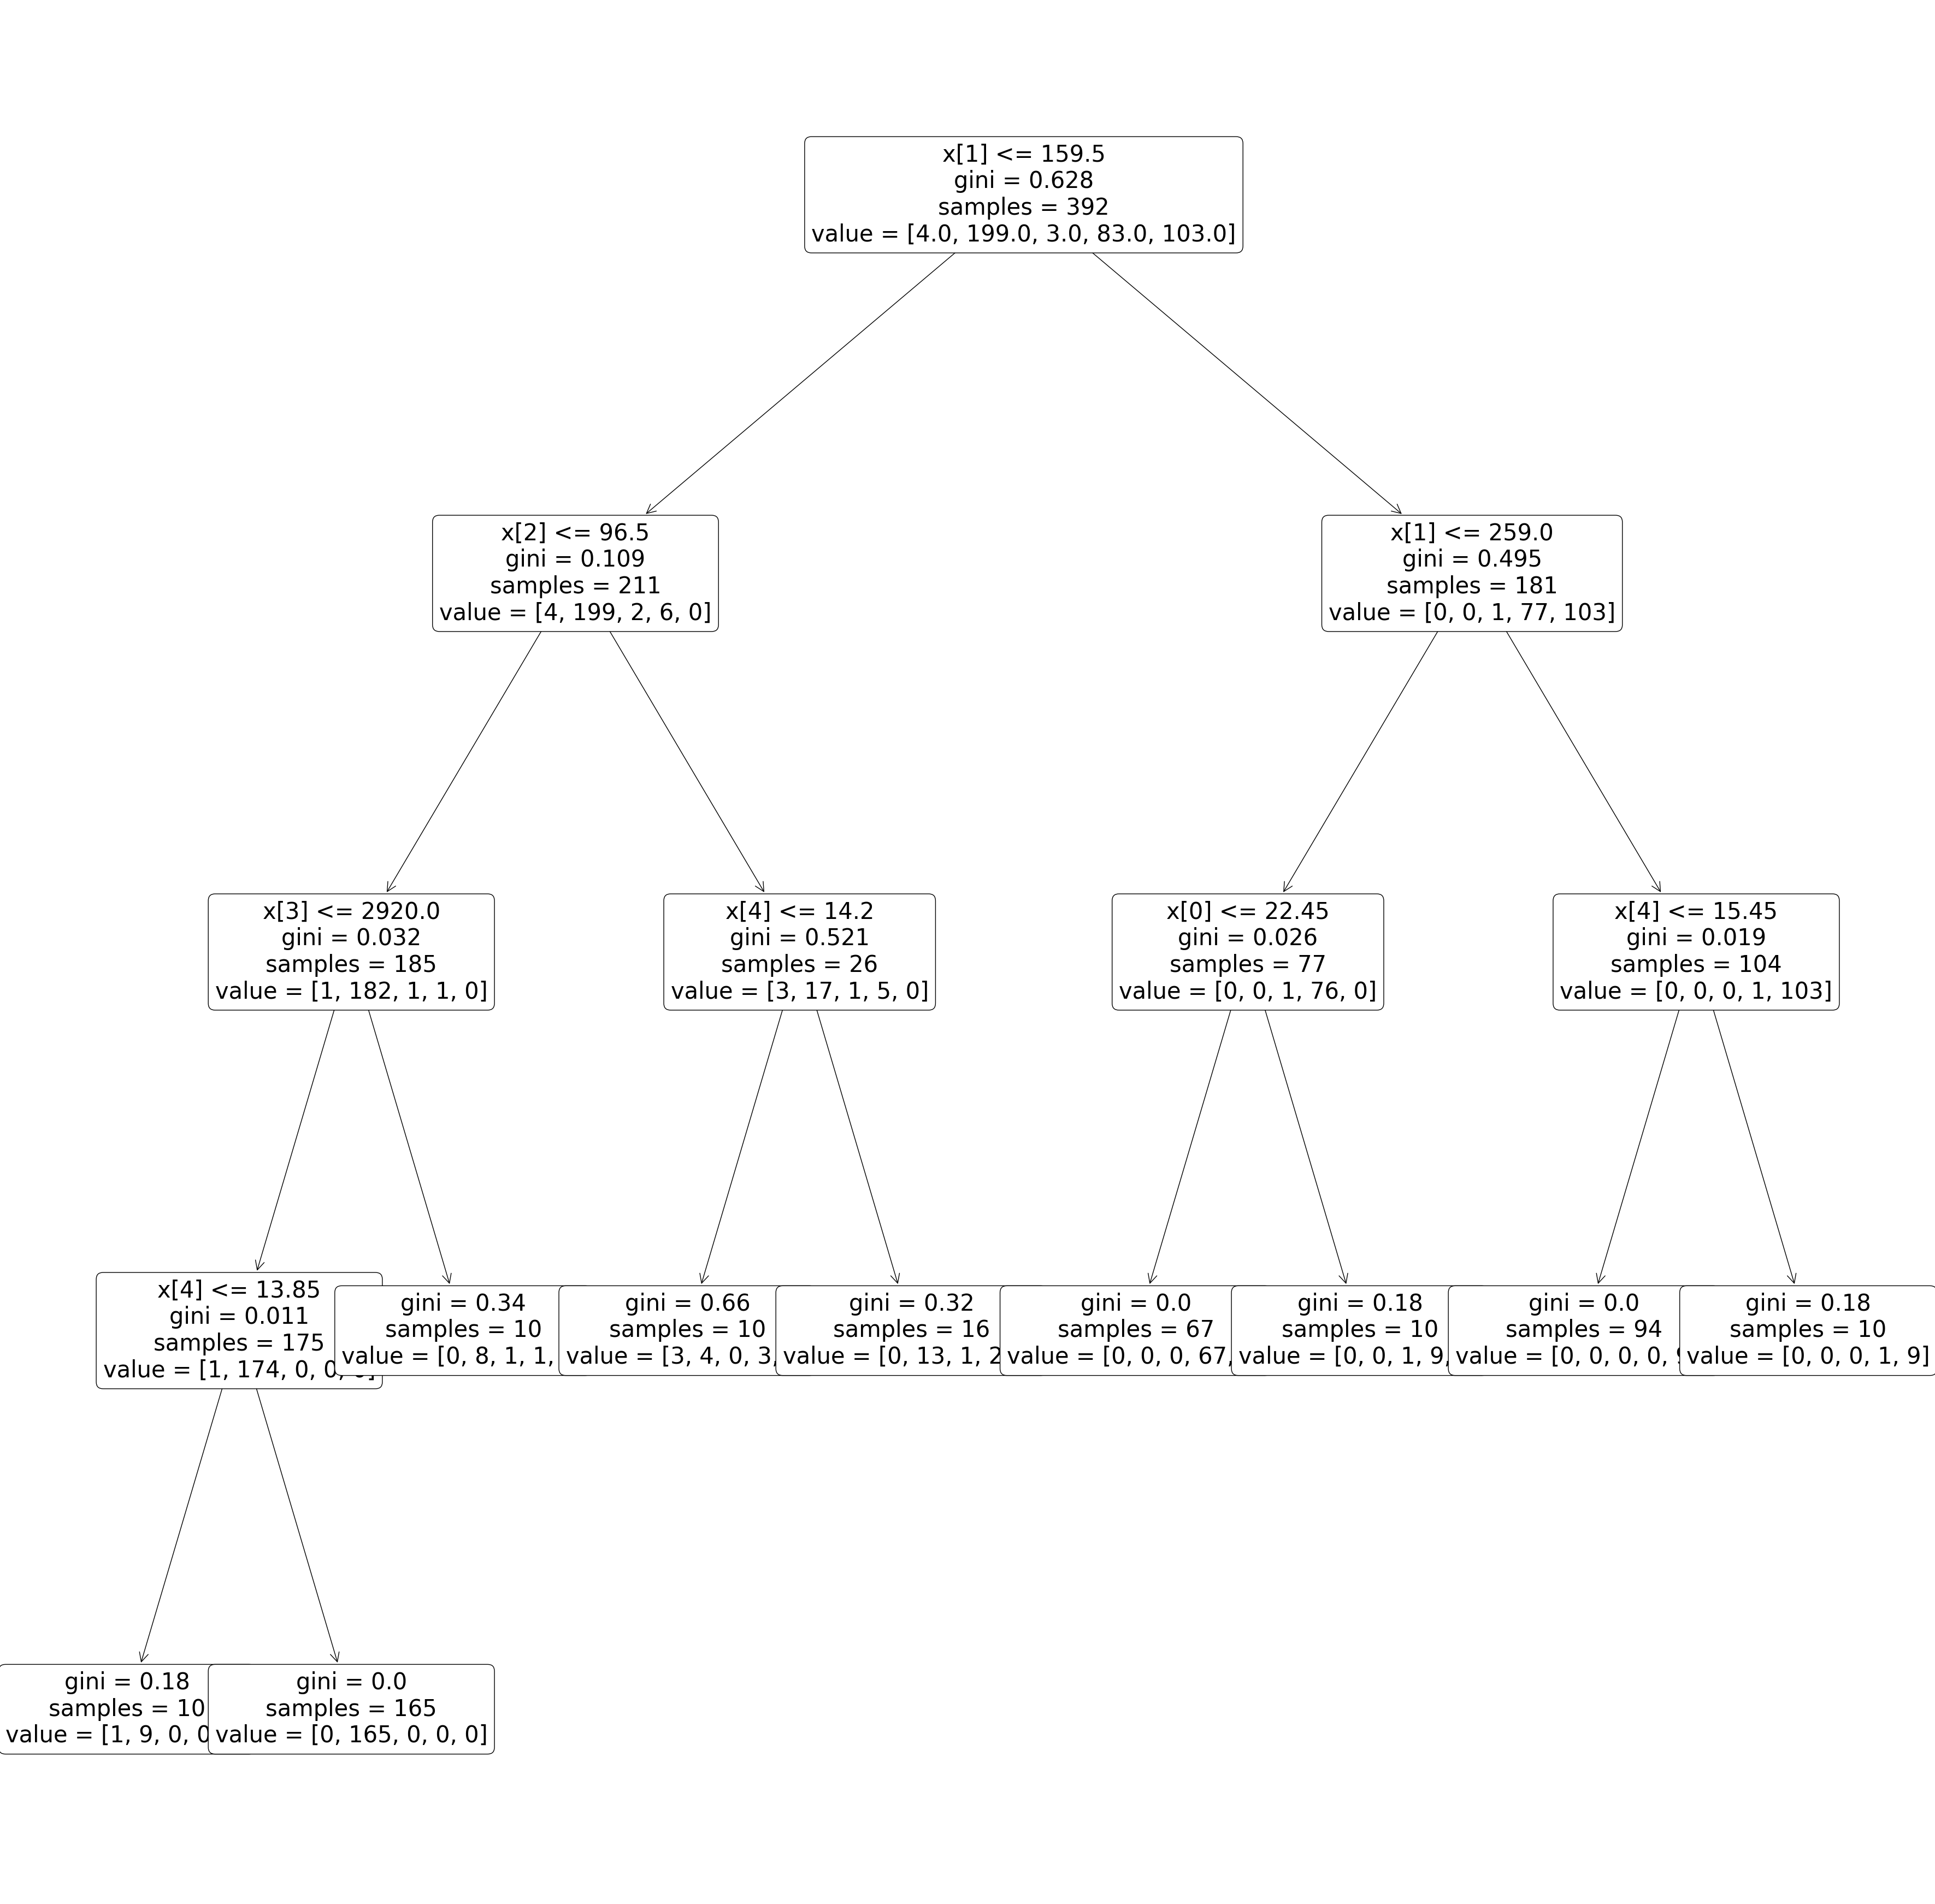

In [8]:
dt = DecisionTreeClassifier(min_samples_leaf = 10)
dt.fit(X, y)
plt.figure(figsize=(45,45))
plot_tree(dt,max_depth=30,label='all',rounded=True,fontsize=30)

In [13]:
?DecisionTreeClassifier


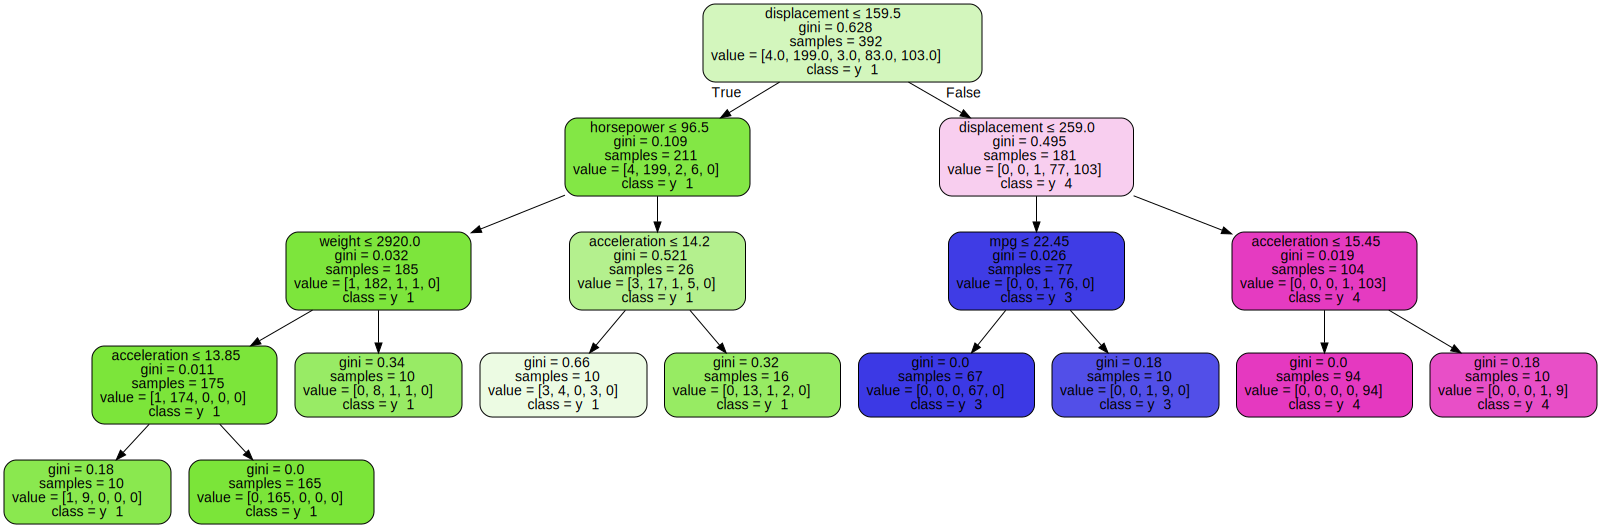

In [25]:
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz
def plot_of_tree(clf):
    #preprocessor.fit(X)
    #preprocessor.transform(df.drop(columns = ["condition"]))
    dot_data = tree.export_graphviz(clf, 
                      #feature_names=preprocessor.get_feature_names_out(),
                      feature_names=X.columns,
                      class_names=True,  
                      filled=True, rounded=True,  
                      special_characters=True,
                      out_file=None,
                               )
    graph = graphviz.Source(dot_data)
    return graph
plot_of_tree(dt) 

In [27]:
set(y)

{3, 4, 5, 6, 8}